# Polar coding for any $N$ with array for speeding up
We develop the simplist Polar coding example assuming the length of code is $N$=2. This will be used for AI example using Tensorflow. We will see how new rx method imitate Polar.
- input을 꼬아 주어야 한다. 앞쪽에서 뺼때는 꼬여있어야 하기 때문이다.

## Common functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

In [3]:
from wireless import nb_polar

BER for each bit [0.75 0.25]
Auto: frozen_flag_n = [0 0]


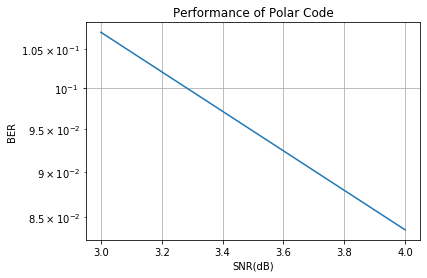

SNRdB_list, BER_list
[3, 4] [0.1073, 0.08365]


In [4]:
polar = nb_polar.PolarCodeFrozen(N_code=2, K_code=2, frozen_flag='auto')
polar.run(SNRdB_list=list(range(3,5)), N_iter=10000, flag_fig=True)    

BER for each bit [0.75 0.25]
Auto: frozen_flag_n = [0 0]


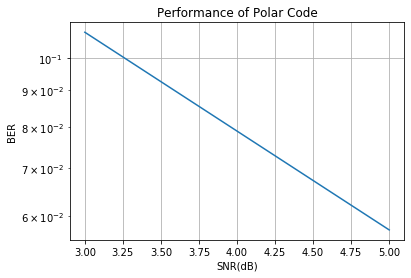

SNRdB_list, BER_list
[3, 5] [0.1086, 0.0574]


In [5]:
polar = nb_polar.NPolarCodeFrozen(N_code=2, K_code=2, frozen_flag='auto')
polar.run(SNRdB_list=[3,5], N_iter=10000, flag_fig=True)    

In [6]:
@nb.jit
def encode_n(u):
    """
    x = uBF(xn) where n = log(N), N=len(u), B is bit-reverse
    """
    x = np.copy(u)
    L = len(u)
    if L != 1:
        u1 = u[0::2]
        u2 = u[1::2]
        u1u2 = np.mod(u1 + u2, 2) 
        x[:L/2] = encode_n(u1u2)
        x[L/2:] = encode_n(u2)
    return x

In [10]:
encode_n(np.array([1,1]))
#np.array([1,1])

array([0, 1])